# SC1015 Mini Project B124 Team 3
## By Toh Jia Jun Benjamin (U2221277C) and Yang Jerry (U2220465C)

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import urllib
import math
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

# Reading datasets and combining them

In [2]:
Data2012 = pd.read_csv('prices-mar-2012-to-dec-2014.csv')
Data2016 = pd.read_csv('prices-from-jan-2015-to-dec-2016.csv')
Data2017 = pd.read_csv('prices--jan-2017-onwards.csv')
Data = pd.concat([Data2012, Data2016, Data2017], ignore_index=True)

## Checking info of the data and removing considered unimportant data

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169730 entries, 0 to 169729
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                169730 non-null  object 
 1   town                 169730 non-null  object 
 2   flat_type            169730 non-null  object 
 3   block                169730 non-null  object 
 4   street_name          169730 non-null  object 
 5   storey_range         169730 non-null  object 
 6   floor_area_sqm       169730 non-null  float64
 7   flat_model           169730 non-null  object 
 8   lease_commence_date  169730 non-null  int64  
 9   resale_price         169730 non-null  float64
 10  remaining_lease      117527 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 14.2+ MB


In [4]:
display(Data)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
169725,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months
169726,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months
169727,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66 years 04 months
169728,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months


In [5]:
print(Data.nunique())

month                   103
town                     26
flat_type                 7
block                  2454
street_name             550
storey_range             25
floor_area_sqm          172
flat_model               20
lease_commence_date      54
resale_price           3429
remaining_lease         673
dtype: int64


In [6]:
display(Data.month)

0         2012-03
1         2012-03
2         2012-03
3         2012-03
4         2012-03
           ...   
169725    2020-09
169726    2020-09
169727    2020-09
169728    2020-09
169729    2020-09
Name: month, Length: 169730, dtype: object

## Grouping the data into years instead of month:

In [7]:
Data['year'] = Data['month'].str[:4]
Data['year'] = Data['year'].astype(str).astype(int)

Data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN,2012
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN,2012
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN,2012
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN,2012
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
169725,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months,2020
169726,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months,2020
169727,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66 years 04 months,2020
169728,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months,2020


In [8]:
print(Data.town.unique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


In [9]:
print(Data.flat_type.unique())

['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' 'MULTI-GENERATION'
 '1 ROOM']


Text(0.5, 1.0, 'Resale Price relation to Flat Type')

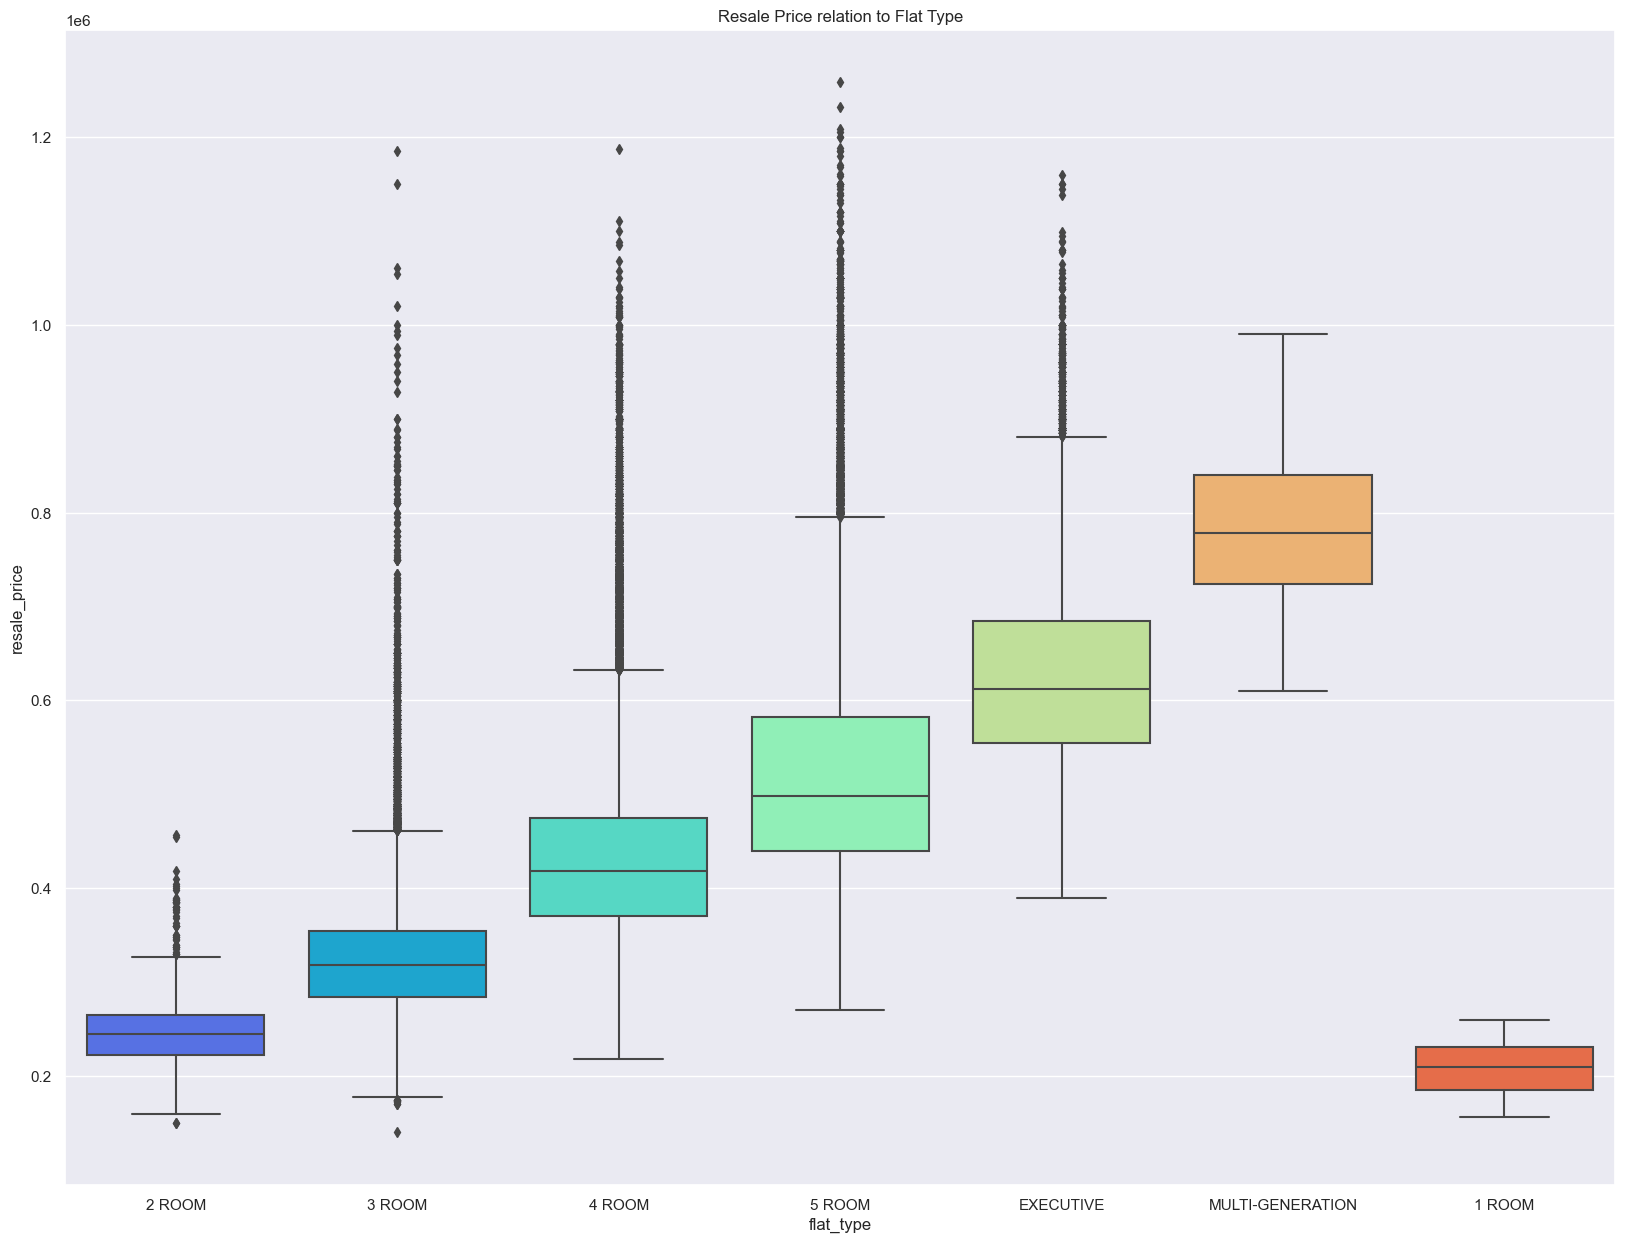

In [10]:
plt.figure(figsize=(20,15))
sb.boxplot(x='flat_type',y='resale_price',data=Data, palette='rainbow')
plt.title("Resale Price relation to Flat Type")

In [11]:
display(Data.block)

0         172
1         510
2         610
3         474
4         604
         ... 
169725    716
169726    760
169727    835
169728    791
169729    387
Name: block, Length: 169730, dtype: object

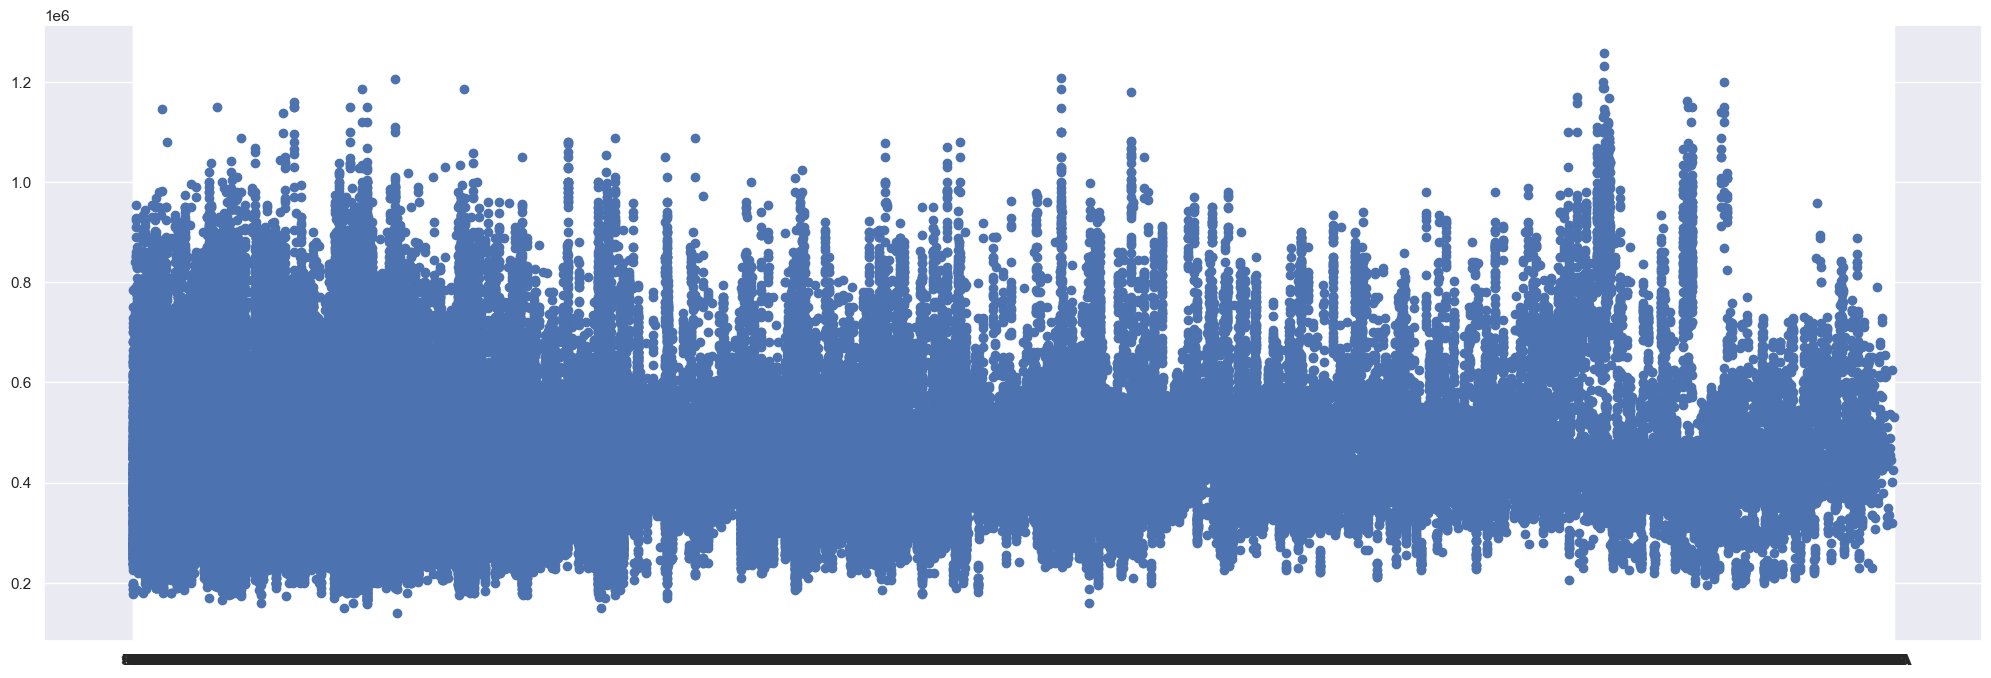

In [12]:
f = plt.figure(figsize=(25, 8))
plt.scatter(Data['block'], Data['resale_price'])

plt.show()

In [13]:
display(Data.street_name)

0          ANG MO KIO AVE 4
1          ANG MO KIO AVE 8
2          ANG MO KIO AVE 4
3         ANG MO KIO AVE 10
4          ANG MO KIO AVE 5
                ...        
169725         YISHUN ST 71
169726         YISHUN ST 72
169727         YISHUN ST 81
169728         YISHUN AVE 2
169729       YISHUN RING RD
Name: street_name, Length: 169730, dtype: object

In [14]:
print(Data.storey_range.unique())

['06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20' '21 TO 25' '26 TO 30'
 '36 TO 40' '31 TO 35' '04 TO 06' '01 TO 03' '07 TO 09' '10 TO 12'
 '13 TO 15' '19 TO 21' '22 TO 24' '16 TO 18' '25 TO 27' '28 TO 30'
 '37 TO 39' '34 TO 36' '31 TO 33' '40 TO 42' '46 TO 48' '43 TO 45'
 '49 TO 51']


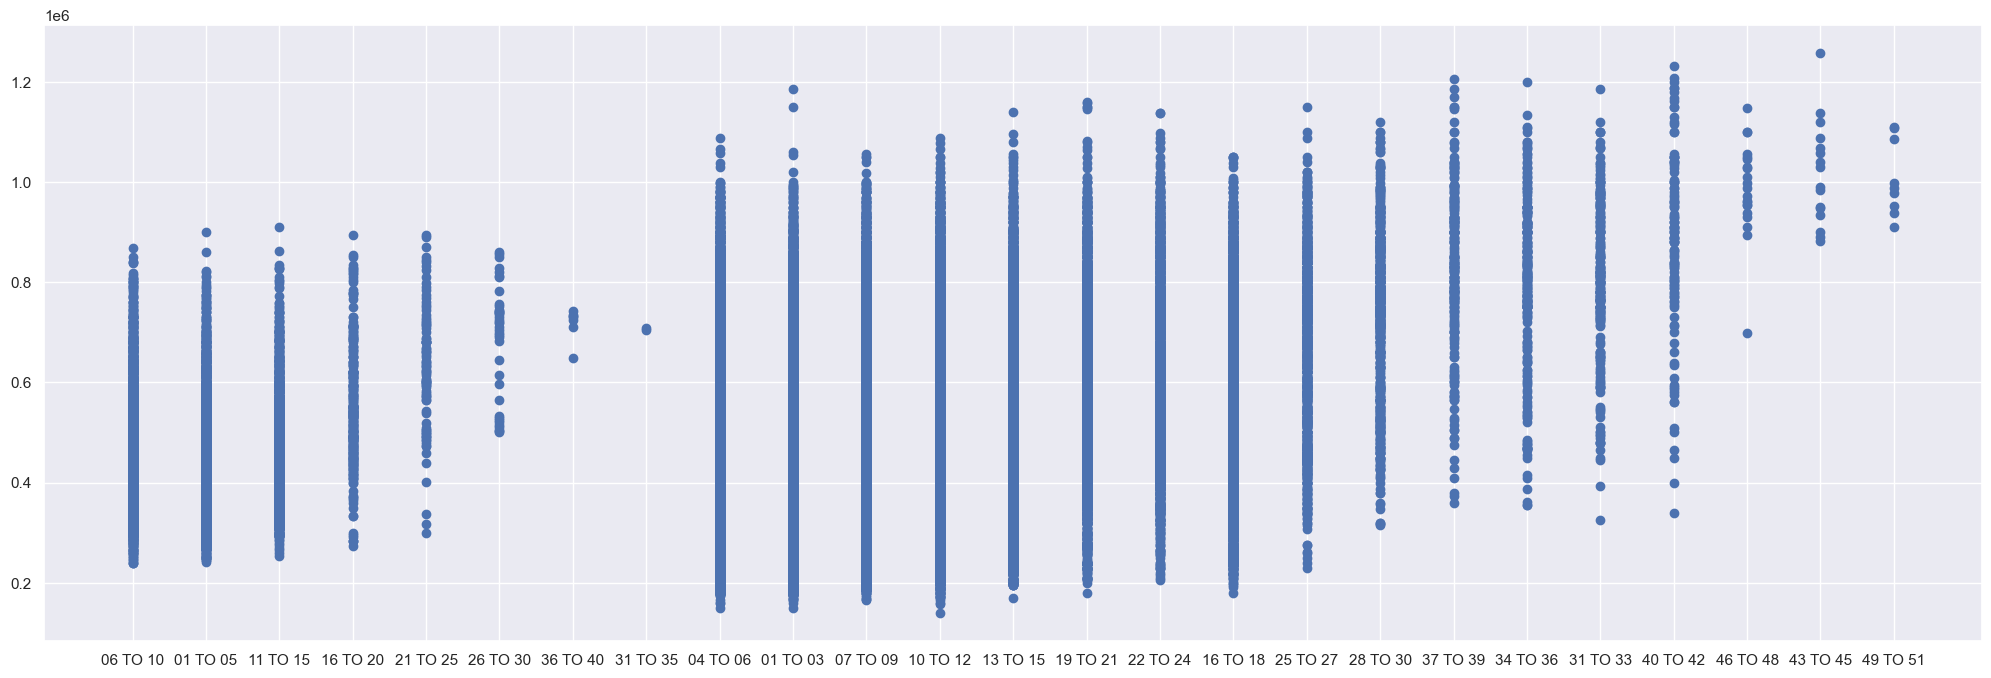

In [15]:
f = plt.figure(figsize=(25, 8))
plt.scatter(Data['storey_range'], Data['resale_price'])
plt.show()

In [16]:
display(Data.floor_area_sqm)

0          45.0
1          44.0
2          68.0
3          67.0
4          67.0
          ...  
169725    131.0
169726    122.0
169727    122.0
169728    146.0
169729    146.0
Name: floor_area_sqm, Length: 169730, dtype: float64

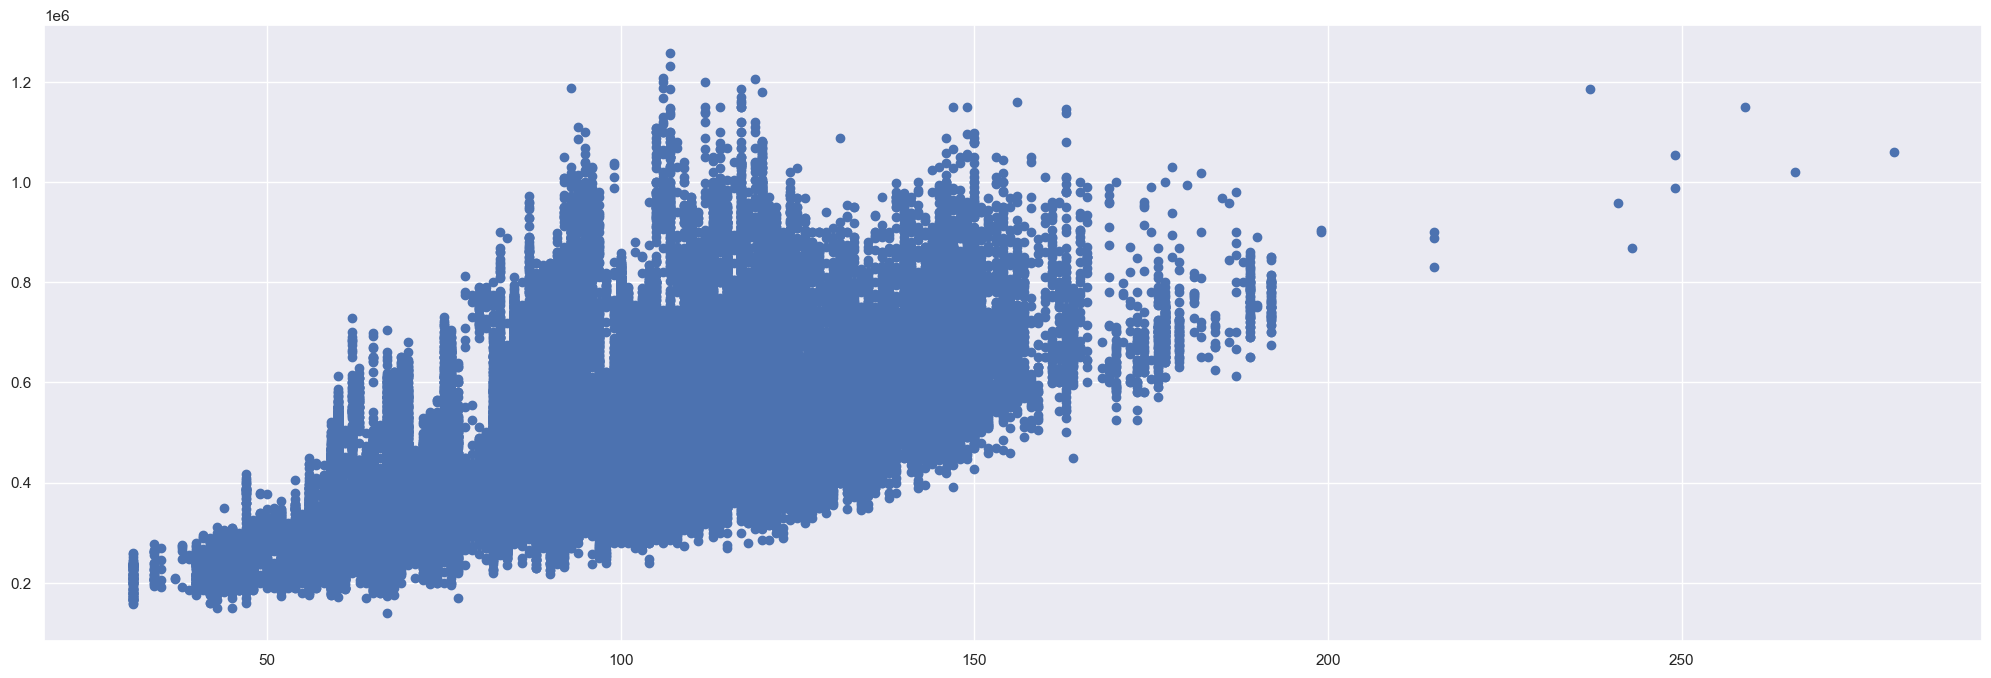

In [17]:
f = plt.figure(figsize=(25, 8))
plt.scatter(Data['floor_area_sqm'], Data['resale_price'])
plt.show()

In [18]:
print(Data.flat_model.unique())

['Improved' 'New Generation' 'Standard' 'Model A' 'Simplified'
 'Premium Apartment' 'Maisonette' 'Model A-Maisonette' 'Apartment'
 'Adjoined flat' 'Multi Generation' 'Model A2' 'Terrace'
 'Improved-Maisonette' 'Premium Maisonette' 'DBSS' 'Type S1' 'Type S2'
 'Premium Apartment Loft' '2-room']


Text(0.5, 1.0, 'Resale Price relation to Flat Model')

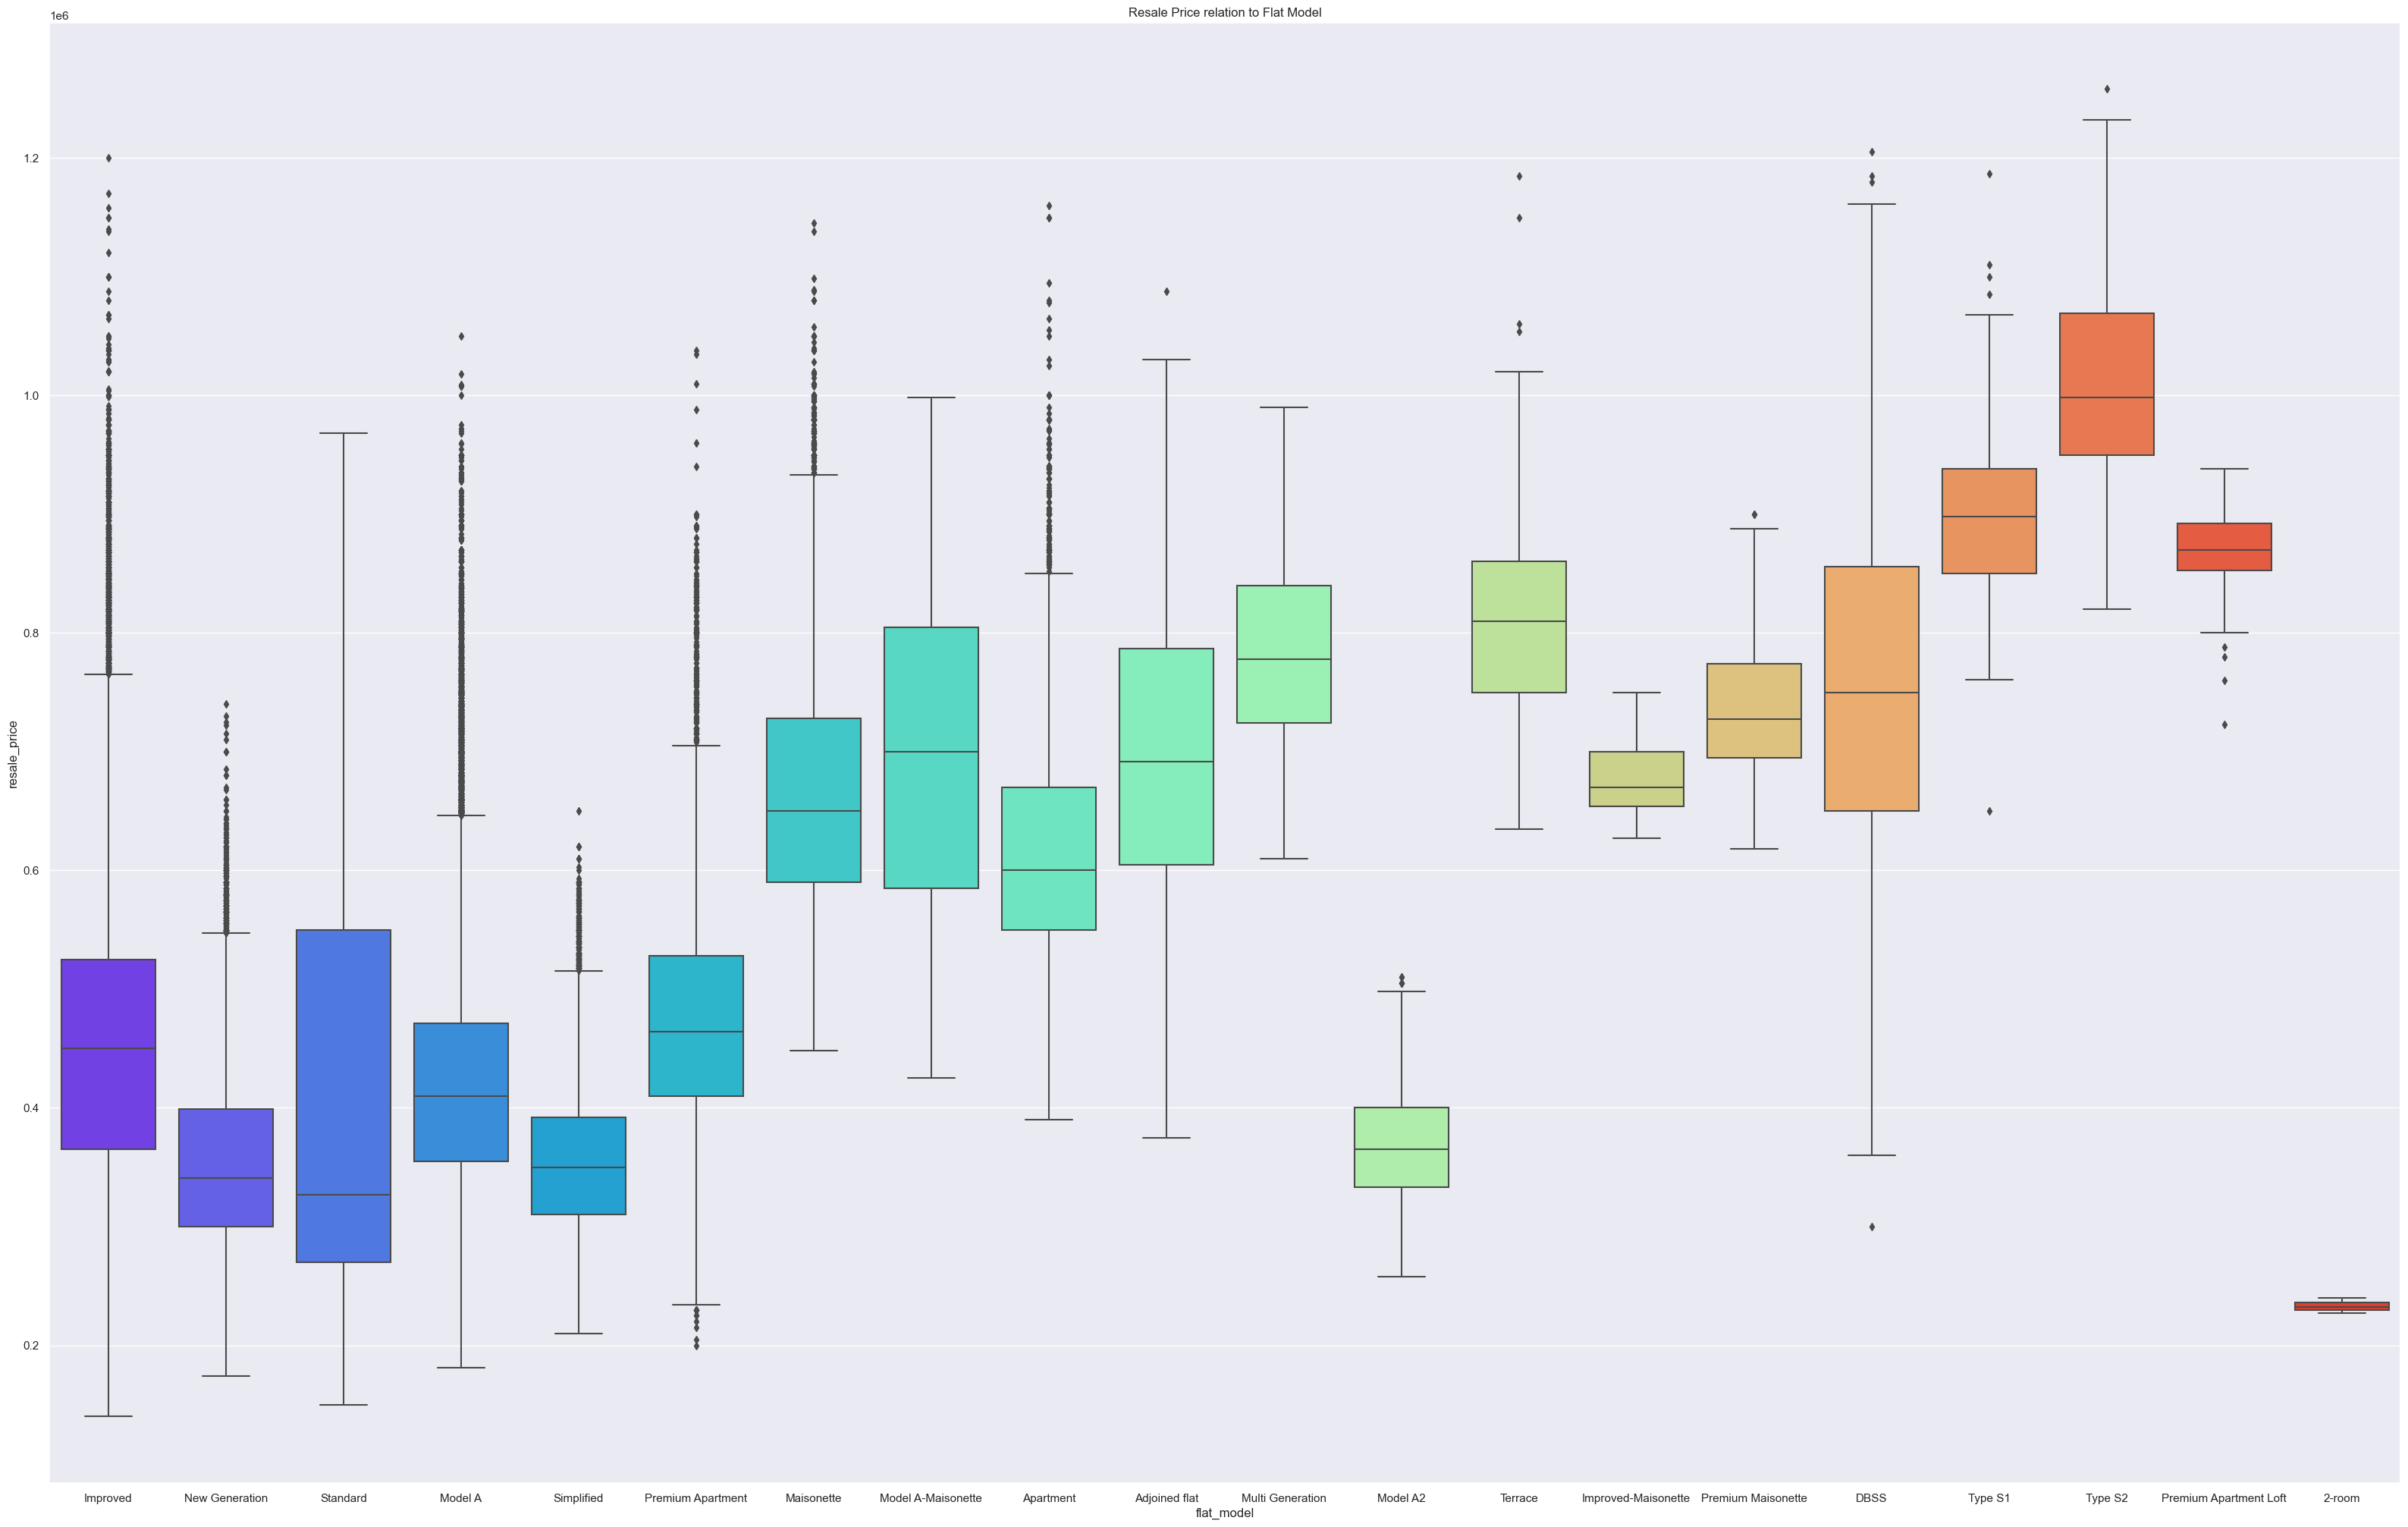

In [19]:
plt.figure(figsize=(40,25))
sb.boxplot(x='flat_model',y='resale_price',data=Data, palette='rainbow')
plt.title("Resale Price relation to Flat Model")

In [20]:
print(Data.lease_commence_date.unique())

[1986 1980 1984 1981 1978 1979 1985 1977 1976 1982 2001 2003 1996 2002
 2006 1972 1988 1983 1975 1987 1993 2000 1997 2005 1989 2010 1990 1992
 1998 2004 1969 1970 1973 2008 2009 1999 2007 1974 1994 1995 1971 1967
 1991 1968 1966 2012 2011 2013 2014 2015 2016 2017 2018 2019]


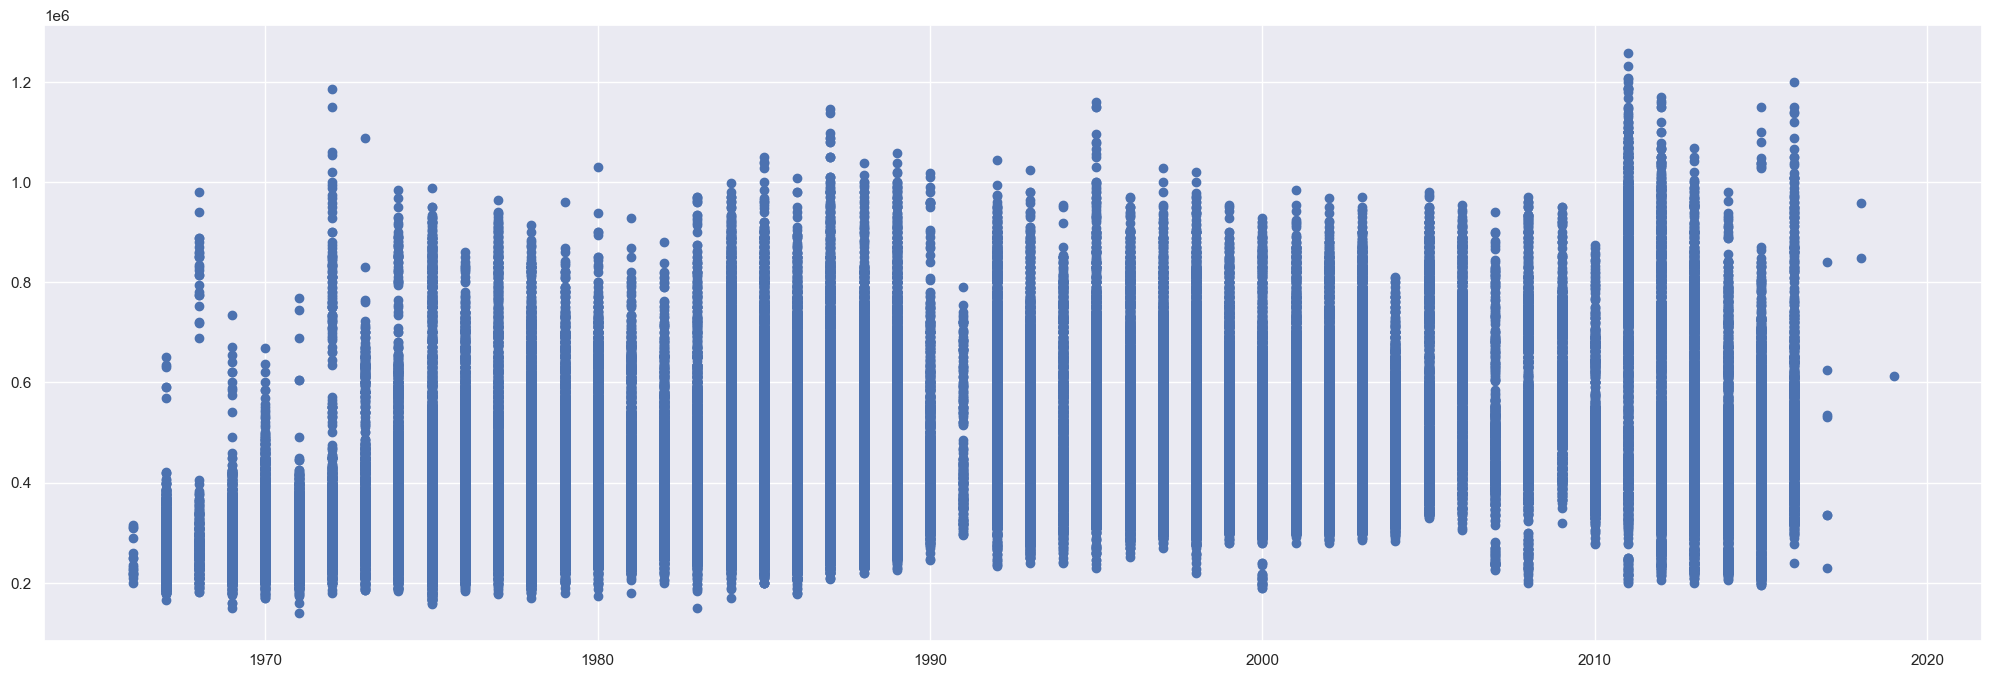

In [21]:
f = plt.figure(figsize=(25, 8))
plt.scatter(Data['lease_commence_date'], Data['resale_price'])
plt.show()

In [22]:
display(Data.resale_price)

0         250000.0
1         265000.0
2         315000.0
3         320000.0
4         321000.0
            ...   
169725    440000.0
169726    458000.0
169727    490000.0
169728    558000.0
169729    555000.0
Name: resale_price, Length: 169730, dtype: float64

In [23]:
display(Data.remaining_lease)

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
169725    66 years 03 months
169726    65 years 06 months
169727    66 years 04 months
169728    66 years 03 months
169729    66 years 09 months
Name: remaining_lease, Length: 169730, dtype: object

In [24]:
Data['remaining_lease'] = Data['lease_commence_date'] + 99 - Data['year']  


In [25]:
display(Data.remaining_lease)

0         73
1         67
2         67
3         71
4         67
          ..
169725    66
169726    66
169727    66
169728    66
169729    67
Name: remaining_lease, Length: 169730, dtype: int64

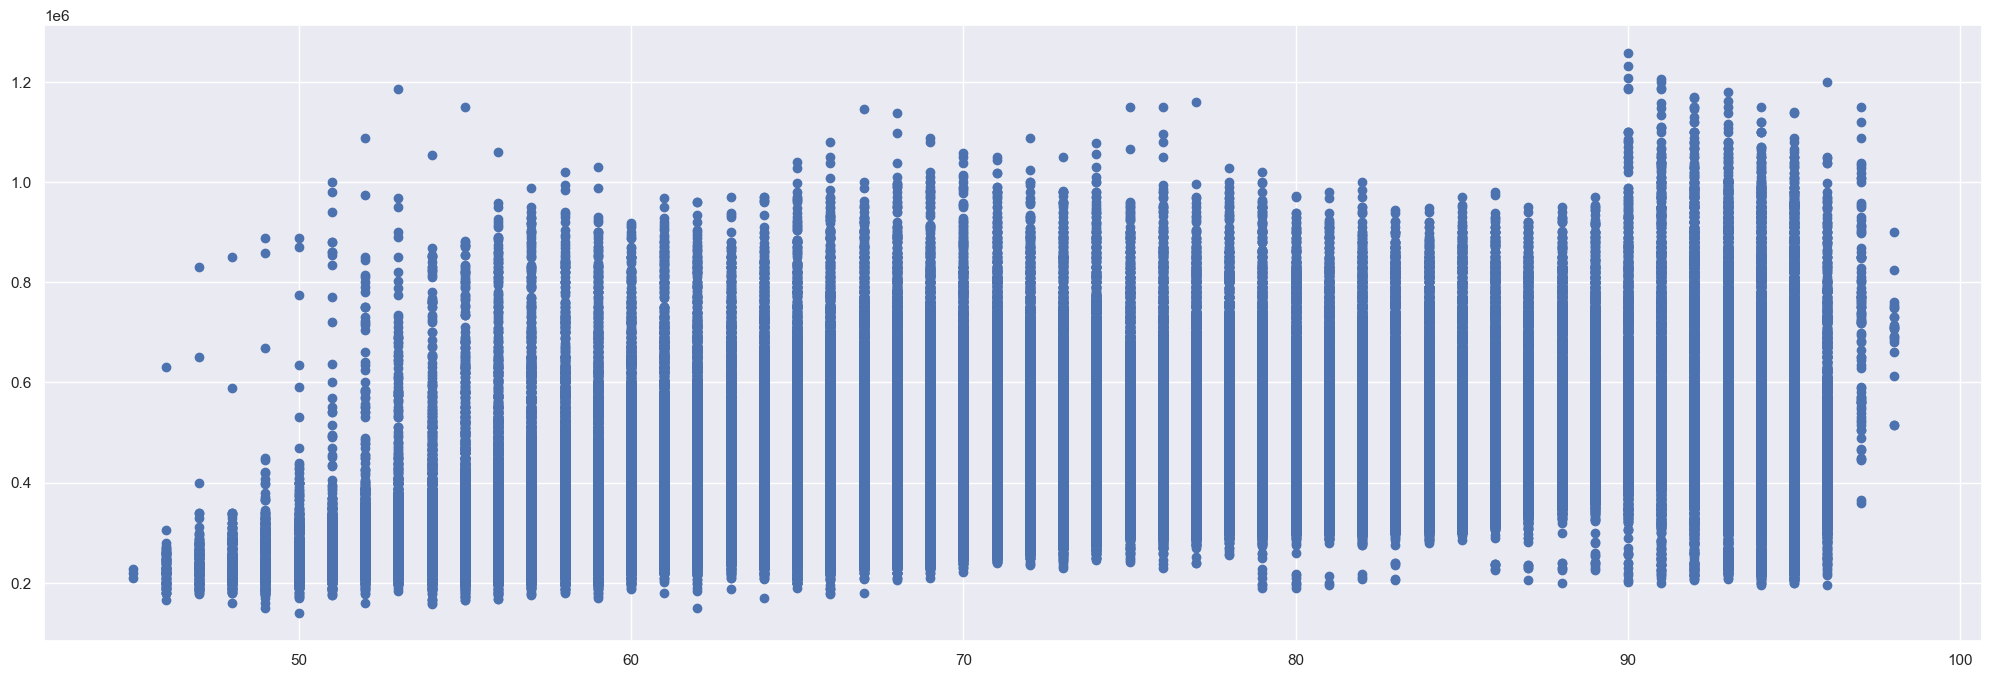

In [26]:
f = plt.figure(figsize=(25, 8))
plt.scatter(Data['remaining_lease'], Data['resale_price'])
plt.show()

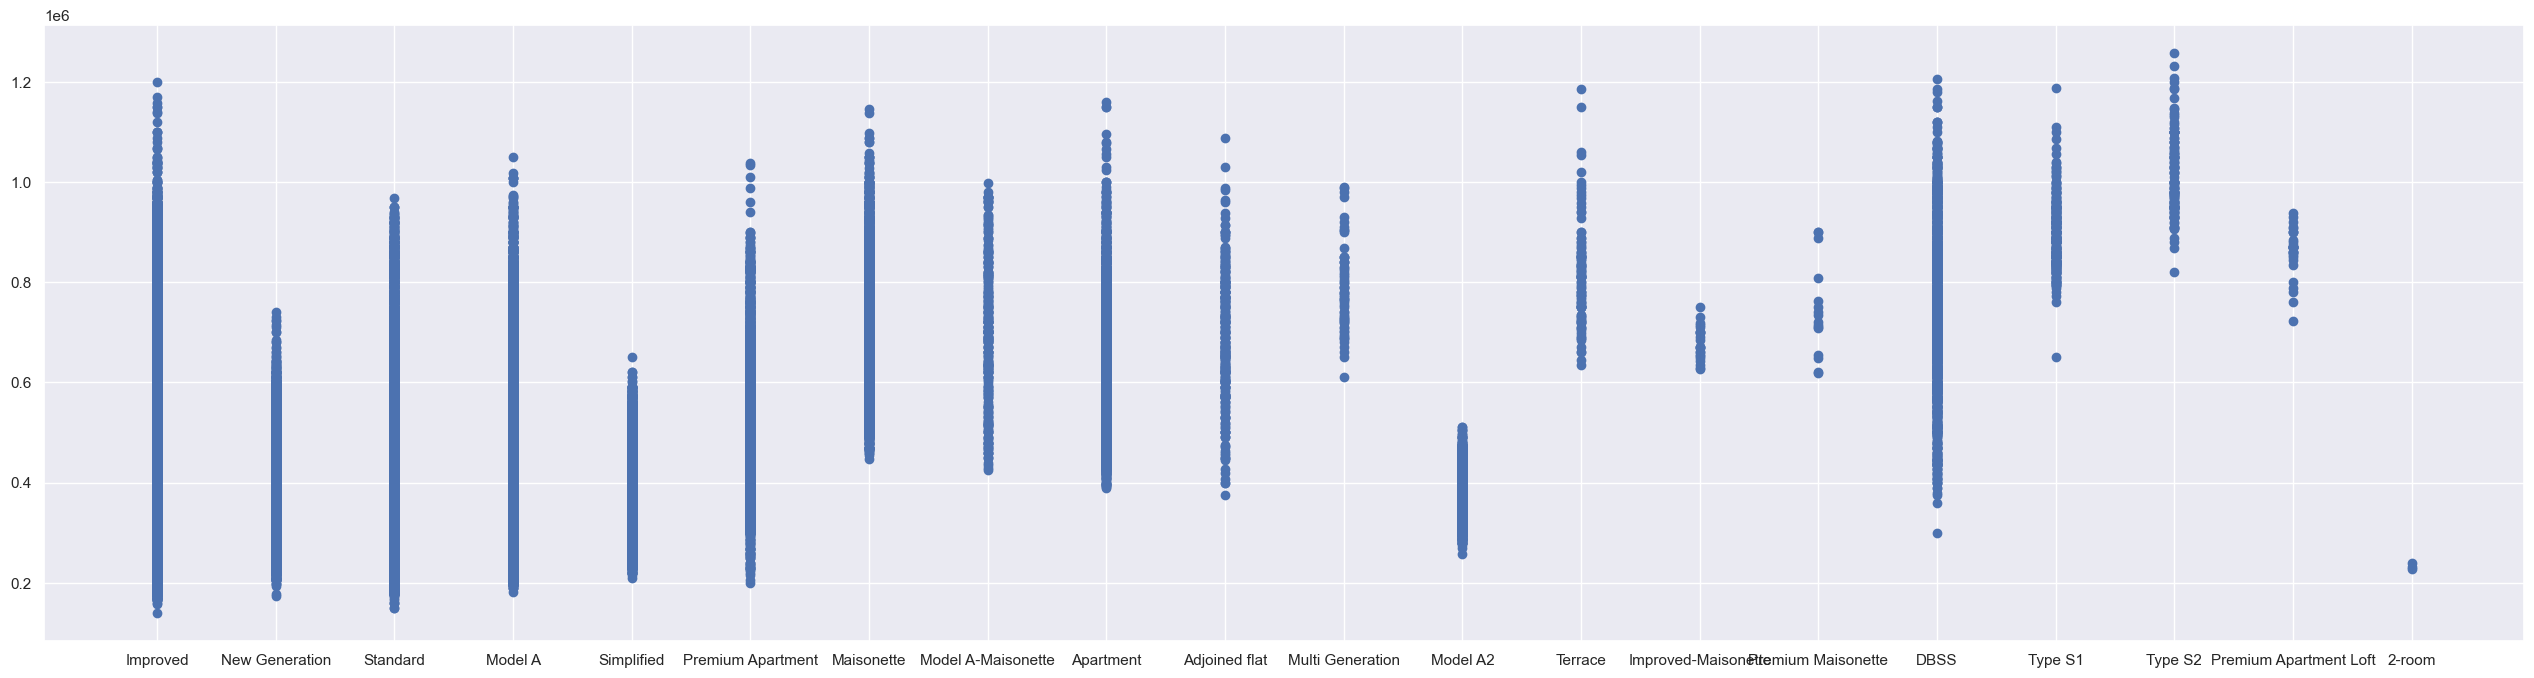

In [27]:
f = plt.figure(figsize=(32, 8))
plt.scatter(Data['flat_model'], Data['resale_price'])
plt.show()

In [28]:
Filter1 = Data.drop(columns = ['block','street_name','storey_range','flat_model',
                            'lease_commence_date'])

We chose to drop the above variables as:
1) block number: Does not have a strong relationship with resale price\
2) Storey Range: Obvious increase with the taller storeys but only for the very high up values so we decided to remove this variable.\
3) remaining lease: Closely related to the lease start year and it contains some NaN values so we decided to use lease start year\
4) flat model: Did not have enough information to analyse of the data (For Labelling) and link it to the price.

In [29]:
Filter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169730 entries, 0 to 169729
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   month            169730 non-null  object 
 1   town             169730 non-null  object 
 2   flat_type        169730 non-null  object 
 3   floor_area_sqm   169730 non-null  float64
 4   resale_price     169730 non-null  float64
 5   remaining_lease  169730 non-null  int64  
 6   year             169730 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 8.4+ MB


## Removing Outliers

In [30]:
def drop_outliers(df,columns):
    for col in columns:
        q1=df[columns].quantile(0.25)
        q3=df[columns].quantile(0.75)
        IQR=q3-q1
        not_outliers = df[~((df[columns]<(q1-1.5*IQR)) | (df[columns]>(q3+1.5*IQR))).any(axis=1)]
        return not_outliers

In [31]:
Filter1 = drop_outliers(Filter1,(['resale_price']))
Filter1

,month,town,flat_type,floor_area_sqm,resale_price,remaining_lease,year
0,2012-03,ANG MO KIO,2 ROOM,45.0,250000.0,73,2012
1,2012-03,ANG MO KIO,2 ROOM,44.0,265000.0,67,2012
2,2012-03,ANG MO KIO,3 ROOM,68.0,315000.0,67,2012
3,2012-03,ANG MO KIO,3 ROOM,67.0,320000.0,71,2012
4,2012-03,ANG MO KIO,3 ROOM,67.0,321000.0,67,2012
...,...,...,...,...,...,...,...
169725,2020-09,YISHUN,5 ROOM,131.0,440000.0,66,2020
169726,2020-09,YISHUN,5 ROOM,122.0,458000.0,66,2020
169727,2020-09,YISHUN,5 ROOM,122.0,490000.0,66,2020
169728,2020-09,YISHUN,EXECUTIVE,146.0,558000.0,66,2020


## Changing categorical information "flat_type" into numerical data through ordinal encoding with regards to size.
### Legends:
1 room flat --> 1\
2 room flat --> 2\
3 room flat --> 3\
4 room flat --> 4\
MultiGeneration flat --> 5\
5 room flat --> 6\
Executive flat --> 7

In [32]:

Filter2 = pd.DataFrame(Filter1)
Filter2['flat_type'] = Filter2['flat_type'].replace(['1 ROOM','2 ROOM','3 ROOM','4 ROOM', '5 ROOM','EXECUTIVE','MULTI-GENERATION'],[1,2,3,4,6,7,5])

In [33]:
Filter2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164008 entries, 0 to 169729
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   month            164008 non-null  object 
 1   town             164008 non-null  object 
 2   flat_type        164008 non-null  int64  
 3   floor_area_sqm   164008 non-null  float64
 4   resale_price     164008 non-null  float64
 5   remaining_lease  164008 non-null  int64  
 6   year             164008 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 9.4+ MB


In [34]:
cols = list(Filter2.columns.values)
cols

['month',
 'town',
 'flat_type',
 'floor_area_sqm',
 'resale_price',
 'remaining_lease',
 'year']

In [35]:

Filter2 = Filter2[['resale_price', 'year', 'remaining_lease' ,'floor_area_sqm', 'flat_type','town']]
cols = list(Filter2.columns.values)
cols

['resale_price',
 'year',
 'remaining_lease',
 'floor_area_sqm',
 'flat_type',
 'town']

## Checking relation between the variables and salesprice:
### Checking Relations between numerical datas.

<AxesSubplot:>

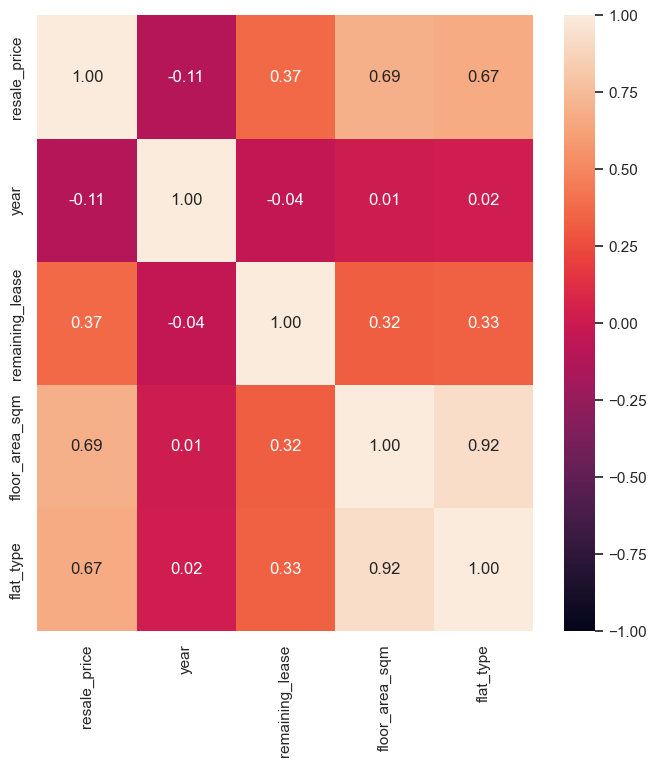

In [36]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(Filter2.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

## Using One-hot Encoding to convert Location Data from categorical to Numerical Data

In [37]:
Location = pd.get_dummies(Filter2['town'])
# dropping extra column
LocData = Filter2['resale_price']
# concatation of independent variables and new cateorical variable.
LocData=pd.concat([LocData,Location],axis=1)
RegressionData = pd.concat([Filter2,Location],axis=1)
RegressionData = RegressionData.drop(columns = ['town'])
RegressionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164008 entries, 0 to 169729
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   resale_price     164008 non-null  float64
 1   year             164008 non-null  int32  
 2   remaining_lease  164008 non-null  int64  
 3   floor_area_sqm   164008 non-null  float64
 4   flat_type        164008 non-null  int64  
 5   ANG MO KIO       164008 non-null  uint8  
 6   BEDOK            164008 non-null  uint8  
 7   BISHAN           164008 non-null  uint8  
 8   BUKIT BATOK      164008 non-null  uint8  
 9   BUKIT MERAH      164008 non-null  uint8  
 10  BUKIT PANJANG    164008 non-null  uint8  
 11  BUKIT TIMAH      164008 non-null  uint8  
 12  CENTRAL AREA     164008 non-null  uint8  
 13  CHOA CHU KANG    164008 non-null  uint8  
 14  CLEMENTI         164008 non-null  uint8  
 15  GEYLANG          164008 non-null  uint8  
 16  HOUGANG          164008 non-null  uint

### Checking Relation of town and resale price

Text(0.5, 1.0, 'Price relation to town')

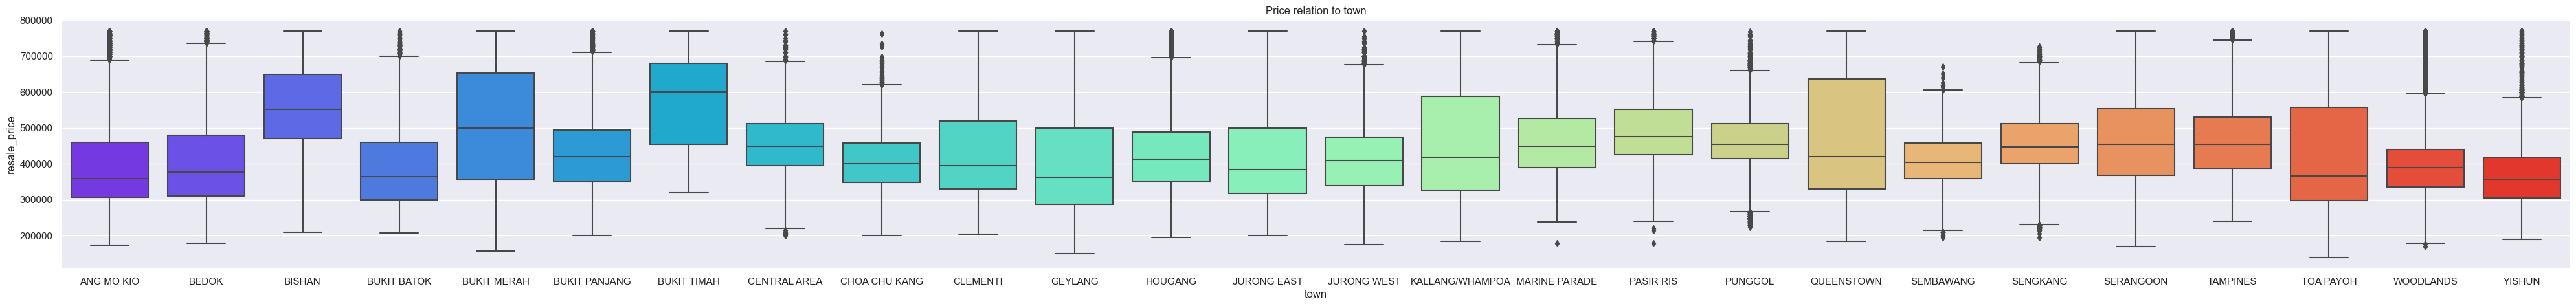

In [38]:
plt.figure(figsize=(50,5))
sb.boxplot(x='town',y='resale_price',data=Filter2, palette='rainbow')
plt.title("Price relation to town")

Text(0.5, 1.0, 'Resale Price relation to Year')

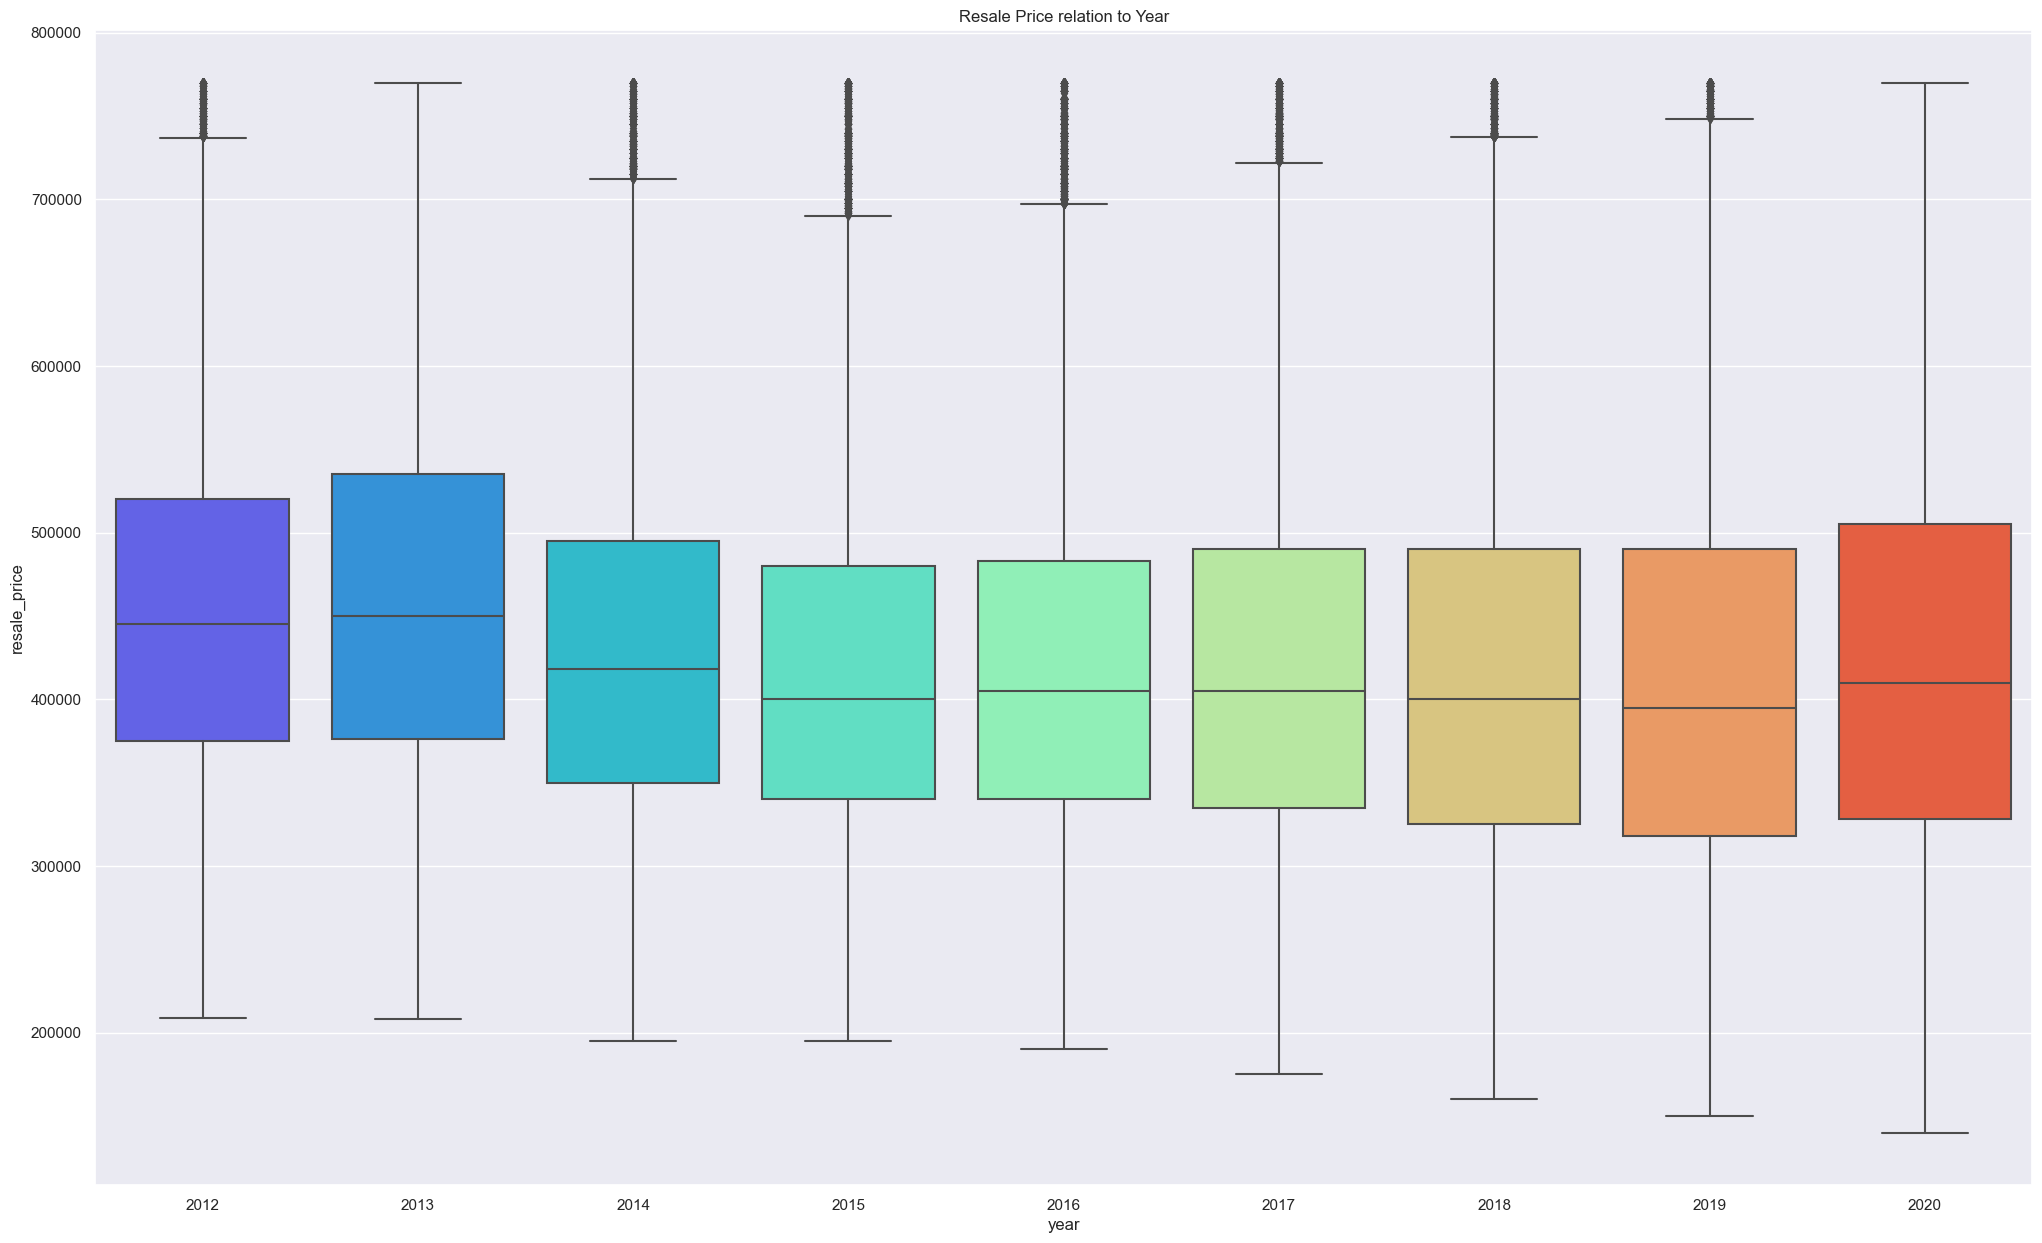

In [39]:
plt.figure(figsize=(25,15))
sb.boxplot(x='year',y='resale_price',data=Filter2, palette='rainbow')
plt.title("Resale Price relation to Year")

From the above box plot, it is seen that\
1)the minimum resale price is decreasing over the years\
2)the upper and lower quartile variates slightly\
3)the maximum resale price is around the same\
This may be due to aging of the housing, causing the resale price for older buildings to decrease and thus reducing the lower prices for the more recent years

In [40]:
def GoodnessAndAccuracy(trainx, trainy,testy,model):
    predy = model.predict(trainx)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", model.score(trainx,trainy))
    print("\n")

    # Check the Goodness of Fit (on Test Data)
    print("Predicion of Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(trainy, predy))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(trainy, predy)))
    print("\n")
    return

In [41]:
def LinearModel(trainx,trainy):
    model = LinearRegression().fit(trainx, trainy)
    print('Intercept \t: b = ', model.intercept_)
    print('Coefficients \t: a = ', model.coef_)
    regline_x = trainx
    regline_y = model.intercept_ + model.coef_ * trainx

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(trainx, trainy)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3 )
    plt.show()
    return model

In [42]:
X, y = pd.DataFrame(RegressionData.iloc[:, 1:]), RegressionData['resale_price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50
)
display(X_train)
display(y_train)
display(X_train.shape, X_test.shape)

,year,remaining_lease,floor_area_sqm,flat_type,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
168245,2020,93,93.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116425,2018,79,100.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105370,2017,84,110.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53622,2015,69,69.0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
48846,2014,77,104.0,4,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127089,2018,76,143.0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60785,2015,69,67.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
159007,2020,94,92.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106977,2017,69,74.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


168245    450500.0
116425    375000.0
105370    467000.0
53622     295800.0
48846     440000.0
            ...   
127089    527000.0
60785     308000.0
159007    440888.0
106977    315000.0
150056    755000.0
Name: resale_price, Length: 131206, dtype: float64

(131206, 30)

(32802, 30)

Intercept 	: b =  101503.9118860673
Coefficients 	: a =  [3426.38914659]


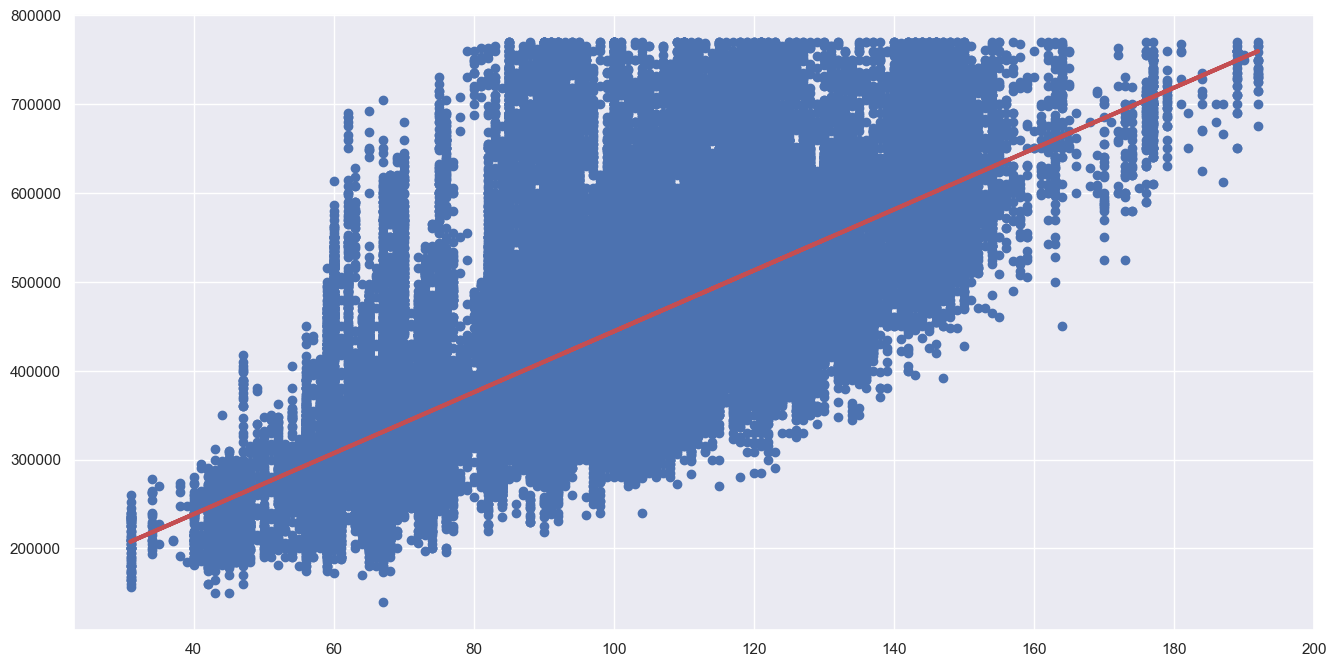

For simple Linear Regression based on floor area:

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47774433369036917


Predicion of Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 7466368732.978347
Root Mean Squared Error (RMSE) 	: 86408.15200534233




In [43]:
LinearReg = LinearModel(pd.DataFrame(X_train['floor_area_sqm']),y_train)
print("For simple Linear Regression based on floor area:\n")
GoodnessAndAccuracy(pd.DataFrame(X_train['floor_area_sqm']),y_train,y_test,LinearReg)

### Multiple Linear Regression:

In [44]:
#df = pd.DataFrame(train)

#x = df[['flat_type' ,'floor_area_sqm' ,'lease_commence_date' ,'year']]
#y = df['resale_price']
 
# with sklearn
MultipleLR = LinearRegression()
MultipleLR.fit(X_train, y_train)

print('Intercept: \n', MultipleLR.intercept_)
print('Coefficients: \n', MultipleLR.coef_)

# with statsmodels
X_MLR = sm.add_constant(X_train) # adding a constant
 
MLRmodel = sm.OLS(y_train, X_MLR).fit() # ordinary least squares
predictions = MLRmodel.predict(X_MLR) 
 
print_model = MLRmodel.summary()
print(print_model)

Intercept: 
 -184242532027872.12
Coefficients: 
 [-3.86906563e+03  4.41277710e+03  3.43626003e+03  8.97635178e+03
  1.84242540e+14  1.84242540e+14  1.84242540e+14  1.84242540e+14
  1.84242540e+14  1.84242540e+14  1.84242540e+14  1.84242540e+14
  1.84242539e+14  1.84242540e+14  1.84242540e+14  1.84242540e+14
  1.84242540e+14  1.84242540e+14  1.84242540e+14  1.84242540e+14
  1.84242540e+14  1.84242540e+14  1.84242540e+14  1.84242539e+14
  1.84242540e+14  1.84242540e+14  1.84242540e+14  1.84242540e+14
  1.84242539e+14  1.84242540e+14]
                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:35:07   Log-Likelihood:            

In [45]:
x_MLR = sm.add_constant(X_test)
y_prediction = MLRmodel.predict(x_MLR)
y_MLR = y_test

MLscore=r2_score(y_test,y_prediction)
print('r2 score is ',MLscore)
print('mean_sqrd_error is==',mean_squared_error(y_MLR,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_MLR,y_prediction)))

r2 score is  0.7927651925698257
mean_sqrd_error is== 2963740941.335698
root_mean_squared error of is== 54440.25111381925


# Gradient Boosting Regression

In [46]:
# X, y = pd.DataFrame(RegressionData.iloc[:, 1:]), RegressionData['resale_price']
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=50
#)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 3,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [48]:
GBreg = ensemble.GradientBoostingRegressor(**params)
GBreg.fit(X_train, y_train)



GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=3,
                          n_estimators=500)

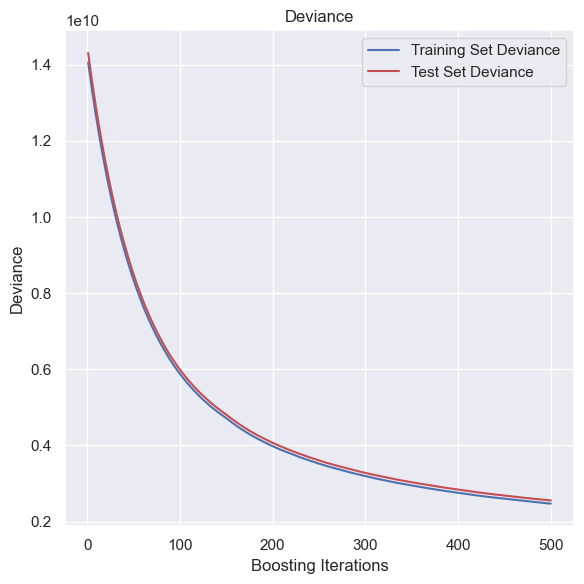

In [49]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(GBreg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    GBreg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

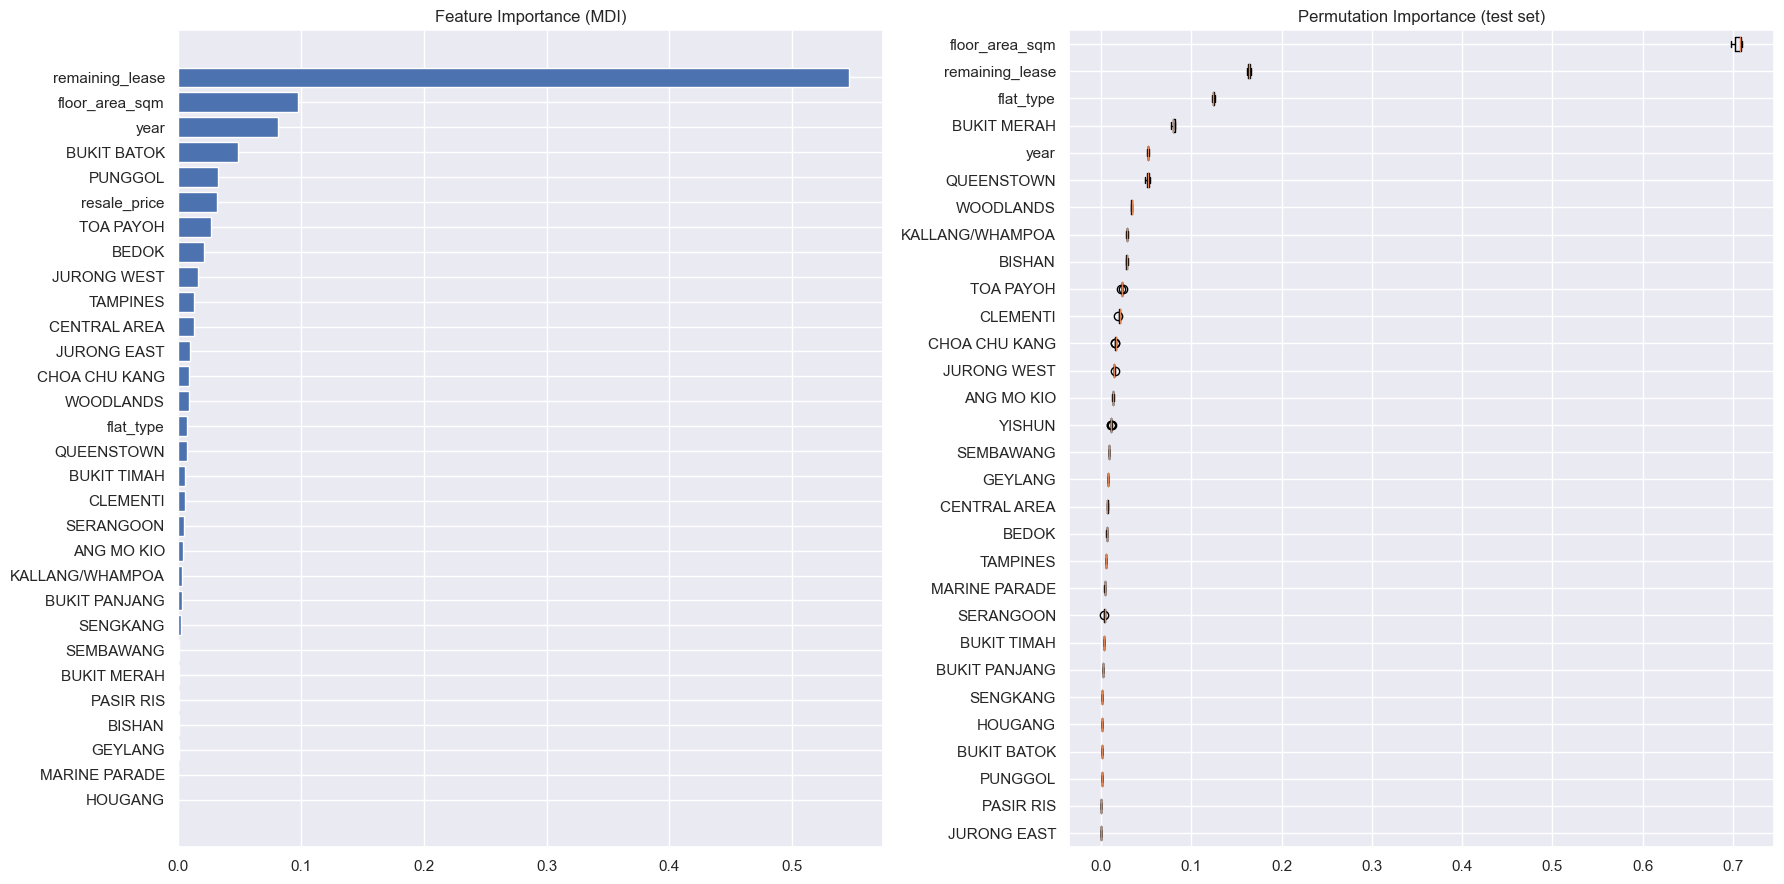

In [50]:
feature_importance = GBreg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(RegressionData.columns.values)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    GBreg, X_test, y_test, n_repeats=10, random_state=50, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [51]:
est = HistGradientBoostingRegressor().fit(X, y)
est.score(X, y)

0.8916804582797471

In [52]:
score=r2_score(y_test, GBreg.predict(X_test))

print('r2 score is ',score)
mse = mean_squared_error(y_test, GBreg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
rmse = math.sqrt(mse)
print("The root mean squared error (MSE) on test set: {:.4f}".format(rmse))

r2 score is  0.8238914741753189
The mean squared error (MSE) on test set: 2553605510.5506
The root mean squared error (MSE) on test set: 50533.2120


In [53]:
params2 = {
    "n_estimators": 1000,
    "max_depth": 10,
    "min_samples_split": 2,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
GBreg1000 = ensemble.GradientBoostingRegressor(**params2)
GBreg1000.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=1000)

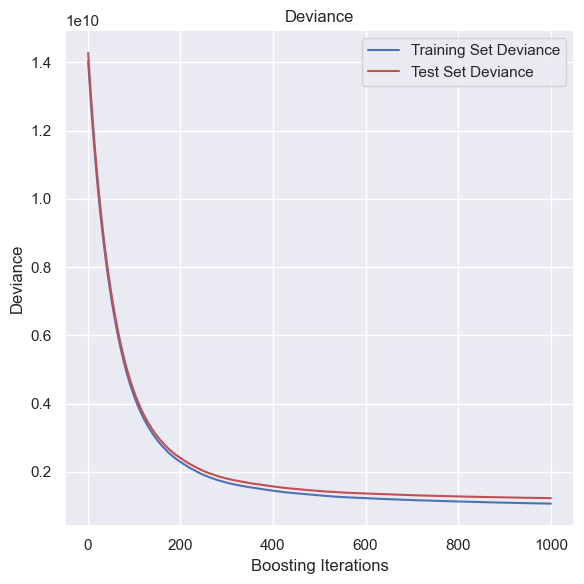

In [54]:
test_score = np.zeros((params2["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(GBreg1000.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params2["n_estimators"]) + 1,
    GBreg1000.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params2["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

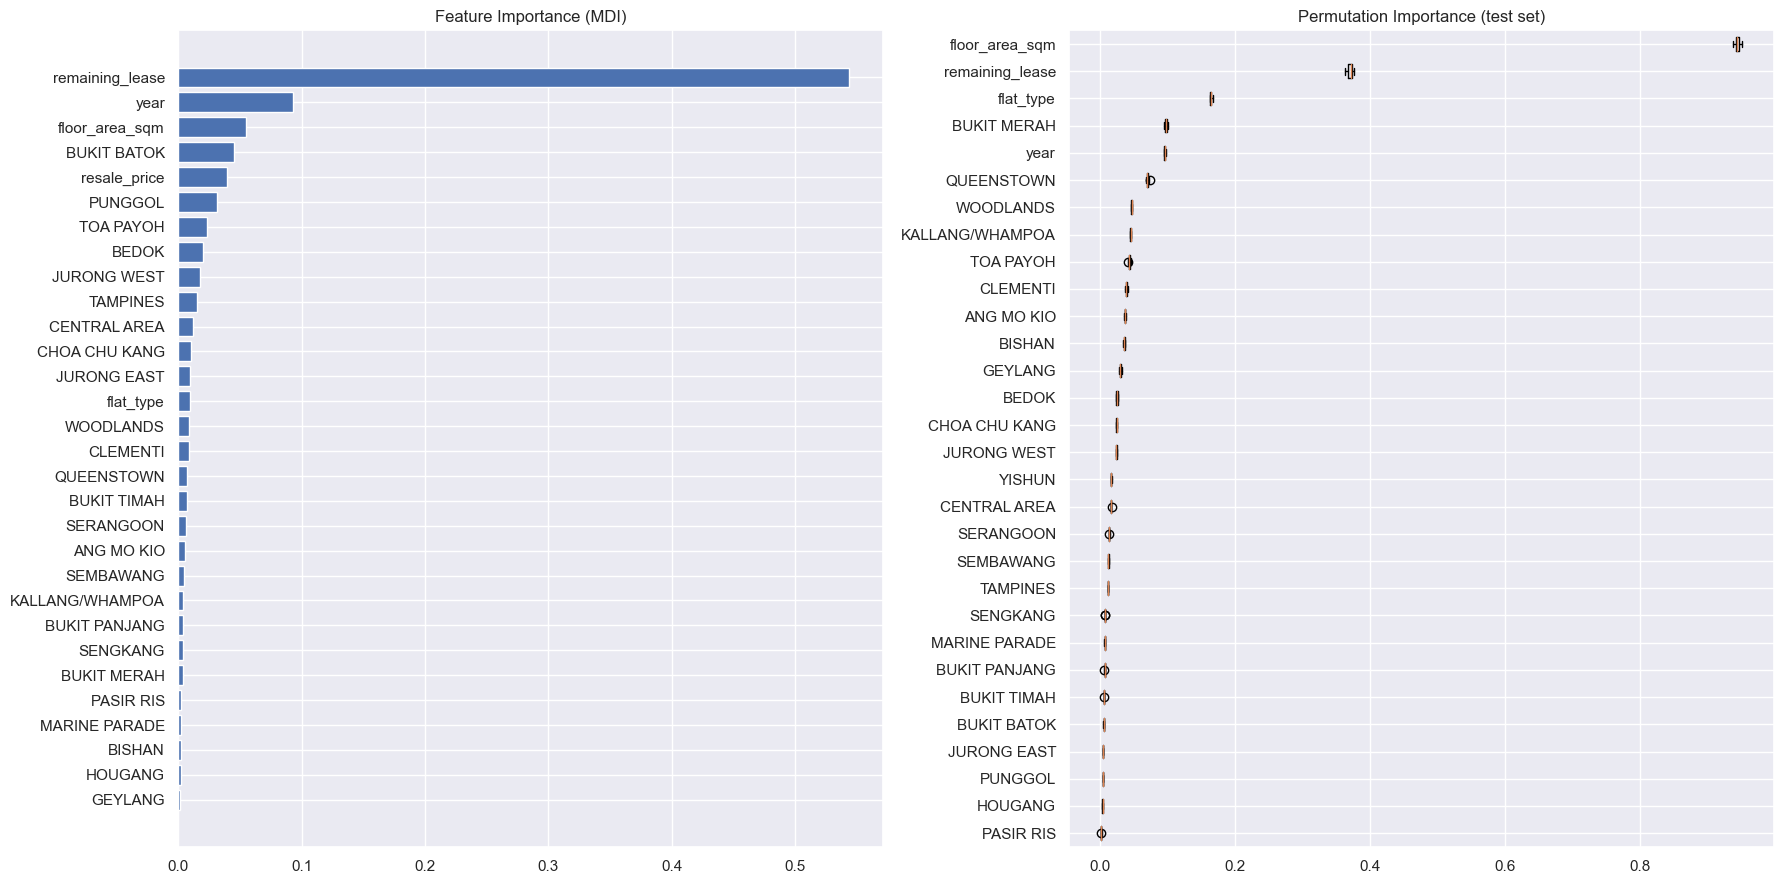

In [55]:
feature_importance = GBreg1000.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(RegressionData.columns.values)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    GBreg1000, X_test, y_test, n_repeats=10, random_state=42, n_jobs=3
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [56]:
score=r2_score(y_test, GBreg1000.predict(X_test))

print('r2 score is ',score)
mse = mean_squared_error(y_test, GBreg1000.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
rmse = math.sqrt(mse)
print("The root mean squared error (MSE) on test set: {:.4f}".format(rmse))

r2 score is  0.9152705153232774
The mean squared error (MSE) on test set: 1228592868.8767
The root mean squared error (MSE) on test set: 35051.2891


## Random Forest Regression:

In [57]:
xlist = list(X_train.columns)
xlist

['year',
 'remaining_lease',
 'floor_area_sqm',
 'flat_type',
 'ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN']

In [58]:
xtrain = np.array(X_train)
ytrain = np.array(y_train)
xtest = np.array(X_test)
ytest = np.array(y_test)

In [59]:
# The baseline predictions are the 
#baseline_preds = X_test[:, y_test]
baseline_preds = LinearReg.predict(pd.DataFrame(X_test['floor_area_sqm']))
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
GB_errors = abs(GBreg.predict(X_test) - y_test)
MLR_errors = abs(MLRmodel.predict(x_MLR) - y_test)
print('Average baseline error(Linear Regression with House area): $', round(np.mean(baseline_errors), 2))
print('Average baseline error(Gradient Boost): $', round(np.mean(GB_errors), 2))
print('Average baseline error(Multiple Linear Regression): $', round(np.mean(MLR_errors), 2))

Average baseline error(Linear Regression with House area): $ 64494.38
Average baseline error(Gradient Boost): $ 37536.17
Average baseline error(Multiple Linear Regression): $ 41728.29


In [60]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(xtrain,ytrain);

In [61]:
# Use the forest's predict method on the test data
predictions = rf.predict(xtest)
# Calculate the absolute errors
errors = abs(predictions - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error: $', round(np.mean(errors), 2))


Mean Absolute Error: $ 23906.41


In [62]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.45 %.


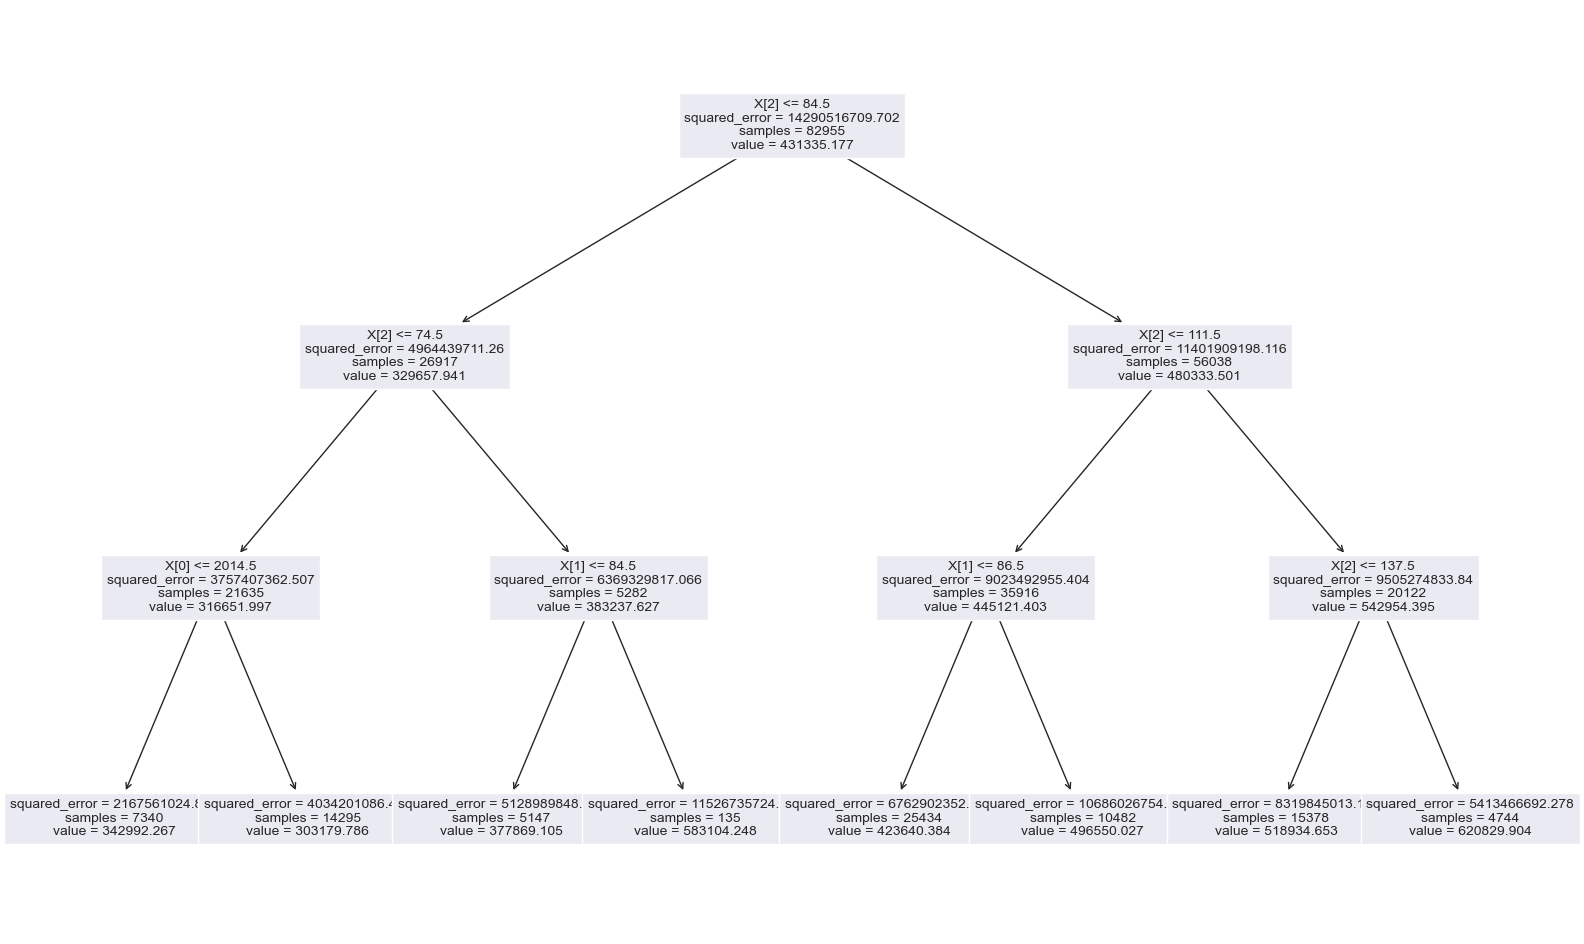

In [63]:
from sklearn import tree

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(xtrain, ytrain)
# Extract the small tree
tree_small = rf_small.estimators_[5]
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(tree_small, fontsize=10)
plt.show()


In [64]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(xlist, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: floor_area_sqm       Importance: 0.57
Variable: remaining_lease      Importance: 0.11
Variable: year                 Importance: 0.05
Variable: BUKIT MERAH          Importance: 0.04
Variable: QUEENSTOWN           Importance: 0.03
Variable: flat_type            Importance: 0.02
Variable: BISHAN               Importance: 0.02
Variable: KALLANG/WHAMPOA      Importance: 0.02
Variable: TOA PAYOH            Importance: 0.02
Variable: WOODLANDS            Importance: 0.02
Variable: ANG MO KIO           Importance: 0.01
Variable: BEDOK                Importance: 0.01
Variable: CENTRAL AREA         Importance: 0.01
Variable: CHOA CHU KANG        Importance: 0.01
Variable: CLEMENTI             Importance: 0.01
Variable: GEYLANG              Importance: 0.01
Variable: JURONG WEST          Importance: 0.01
Variable: SERANGOON            Importance: 0.01
Variable: TAMPINES             Importance: 0.01
Variable: YISHUN               Importance: 0.01
Variable: BUKIT BATOK          Importanc

In [65]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [xlist.index('floor_area_sqm'), xlist.index('remaining_lease')]
train_important = xtrain[:, important_indices]
test_important = xtest[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, ytrain)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - ytest)
# Display the performance metrics
print('Mean Absolute Error: $', round(np.mean(errors), 2))
mape = np.mean(100 * (errors / ytest))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: $ 53870.27
Accuracy: 87.53 %.


In [66]:
rf5 = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf5.fit(xtrain,ytrain);
predictions = rf5.predict(xtest)
# Calculate the absolute errors
errors = abs(predictions - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error: $', round(np.mean(errors), 2))
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: $ 23906.51
Accuracy: 94.45 %.


Difference between the Models:
Reducing n-estimators lowers the Mean Absolute Error slightly but not very significant.
Similar to the Gradient Boosting Model, After reaching a saturation point, the error and accuracy does not have significant changes

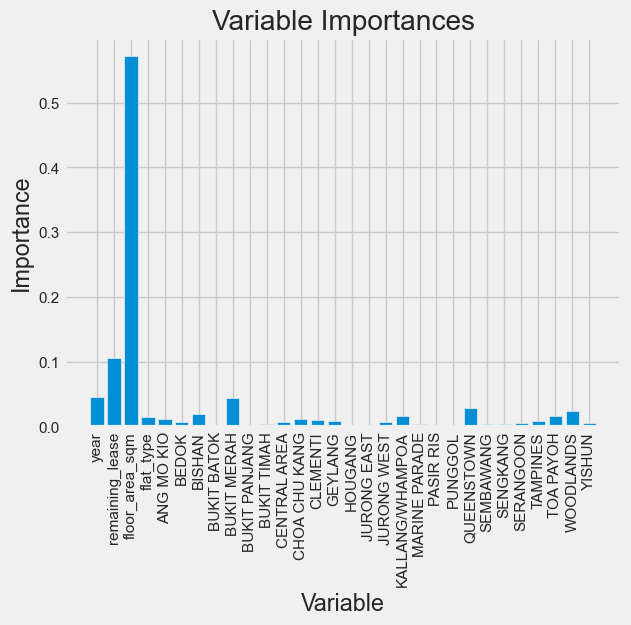

In [67]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, xlist, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [68]:
score=r2_score(y_test, rf.predict(xtest))

print('r2 score is ',score)
mse = mean_squared_error(y_test, rf.predict(xtest))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
rmse = math.sqrt(mse)
print("The root mean squared error (MSE) on test set: {:.4f}".format(rmse))

r2 score is  0.9239270488315394
The mean squared error (MSE) on test set: 1103071565.6607
The root mean squared error (MSE) on test set: 33212.5212


### Compilation of Score and MSE

In [69]:
print('For Random Tree Regression:')
RTRscore=r2_score(y_test, rf.predict(xtest))
print('r2 score is ',score)
RTRmse = mean_squared_error(y_test, rf.predict(xtest))
print("The mean squared error (MSE) on test set: {:.4f}".format(RTRmse))
RTRrmse = math.sqrt(RTRmse)
print("The root mean squared error (MSE) on test set: {:.4f}".format(RTRrmse))

For Random Tree Regression:
r2 score is  0.9239270488315394
The mean squared error (MSE) on test set: 1103071565.6607
The root mean squared error (MSE) on test set: 33212.5212


In [70]:
print("For simple Linear Regression based on floor area:\n")
GoodnessAndAccuracy(pd.DataFrame(X_train['floor_area_sqm']),y_train,y_test,LinearReg)

For simple Linear Regression based on floor area:

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4772106141932164


Predicion of Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 7448011027.779652
Root Mean Squared Error (RMSE) 	: 86301.85993233084




In [71]:
print('For Gradient Boosting Regression:')
GBscore=r2_score(y_test, GBreg.predict(X_test))

print('r2 score is ',score)
GBmse = mean_squared_error(y_test, GBreg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(GBmse))
GBrmse = math.sqrt(GBmse)
print("The root mean squared error (MSE) on test set: {:.4f}".format(GBrmse))

For Gradient Boosting Regression:
r2 score is  0.9239270488315394
The mean squared error (MSE) on test set: 2553605510.5506
The root mean squared error (MSE) on test set: 50533.2120


In [72]:
print('For Multiple Linear Regression:')
y_prediction = MLRmodel.predict(x_MLR)
y_MLR = y_test

MLscore=r2_score(y_test,y_prediction)
print('r2 score is ',MLscore)
print('mean_sqrd_error is :',mean_squared_error(y_MLR,y_prediction))
print('root_mean_squared error of is :',np.sqrt(mean_squared_error(y_MLR,y_prediction)))

For Multiple Linear Regression:
r2 score is  -0.772005986835651
mean_sqrd_error is : 25694407647.343838
root_mean_squared error of is : 160294.7524011433


In [73]:
print('Average baseline error(Linear Regression with House area): $', round(np.mean(baseline_errors), 2))
print('Average baseline error(Gradient Boost): $', round(np.mean(GB_errors), 2))
print('Average baseline error(Multiple Linear Regression): $', round(np.mean(MLR_errors), 2))
predictions = rf.predict(xtest)
# Calculate the absolute errors
errors = abs(predictions - ytest)
print('Average baseline error(Random Forest Regression): $', round(np.mean(errors), 2))

Average baseline error(Linear Regression with House area): $ 64494.38
Average baseline error(Gradient Boost): $ 37536.17
Average baseline error(Multiple Linear Regression): $ 41728.29
Average baseline error(Random Forest Regression): $ 23906.41
